# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


### Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
    
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 
You need to build a model that can differentiate between comments and its categories.   

# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np

# importing plotting libraries:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading the test dataset

In [2]:
df=pd.read_csv("test.csv")
df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [3]:
# Checking the first 5 rows and last 5 rows of the dataset
df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
df.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [5]:
# Checking the sample 10 dataset
df.sample(10)

,id,comment_text
32667,364ffb9e86f7329b,""" \n\n ==Swango== \n Should we take him out of..."
150857,fc311804bb3f9a34,I'm kinda doing this out of order since i'm re...
23130,269883b09010a1b8,""" \n\n == Implementation of Wikipedia:Bureaucr..."
112971,bc8e40b1bb4e7bd6,""" \n\n == Vagina Spiders == \n\n Vagina Spider..."
52510,5730c4eb2e83f240,Eric is a bitch
92093,9982fe49e0d8dfa6,:No. I voted delete either as artspam or hoax....
109424,b685d781251993c6,big dick in small ass
122400,cc689f91b8c22509,""" \n ::Awww, poor baby. I hope your weekend tu..."
12543,1510b815f8bd09e2,Vill du lägga in Palt som nationalrätt behöver...
968,019f1ac430b0bcb7,""" \n\n :Khoikhoi, this block is remarkably ill..."


#### The test dataset for which the predictions are to be done. It includes id and comments_text. 

# Loading the train dataset

In [6]:
train=pd.read_csv("train.csv")
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
#Checking top 5 and bottom 5 rows of the dataset.
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [9]:
#Checking 15 sample data from the dataset
train.sample(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
92749,f7fff495a445025e,"""\n\nPlease sign posts, folks. I'm sure the J...",0,0,0,0,0,0
32004,5506fdc9cb26a7fd,""" UPDATE: Karmosin is also making RACIST STA...",0,0,0,0,0,0
140110,edc953411e956f60,"""\n\nFinancial difficulties\nFinancial difficu...",0,0,0,0,0,0
59751,9ffc5b189c1dcd89,"""\nObservation: It appears that some of those ...",0,0,0,0,0,0
146900,3372b3a03e24f97c,All of these sources are listed by Sourcewatch...,0,0,0,0,0,0
132429,c49f5ea116945e42,You're too late I undid it myself. I was simp...,0,0,0,0,0,0
154632,b0d767a65b2f0fda,"""\n\nGee, Aranherunar is having a mouth diarrh...",0,0,0,0,0,0
96496,04217f979fdff082,BIG UPDATE!! This site has so many facts wron...,0,0,0,0,0,0
63975,ab369a09abd1f1d5,"""\n\n Green Day \nHey on the promo singles. Po...",0,0,0,0,0,0
9923,1a460a85c83f2a56,"""\n\n Cleanup tag \n\nI've added a cleanup tag...",0,0,0,0,0,0


### OUR MAIN DATASET IS TRAIN DATASET AND TEST DATASET IS OUR PREDICTION DATASET

# Exploratory Data Analysis (EDA)

In [10]:
train.shape

(159571, 8)

- We can see that our main train dataset has 159571 rows and 8 columns.

In [11]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

- The 8 columns are id,comment_text, malignant, highly_malignant, rude, threat, abuse, loathe.

- Column Description:
    1. Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
    2. Highly Malignant: It denotes comments that are highly malignant and hurtful. 
    3. Rude: It denotes comments that are very rude and offensive.
    4. Threat: It contains indication of the comments that are giving any threat to someone. 	
    5. Abuse: It is for comments that are abusive in nature. 
    6. Loathe: It describes the comments which are hateful and loathing in nature.  
    7. ID: It includes unique Ids associated with each comment text given.   
    8. Comment text: This column contains the comments extracted from various social media platforms. 

In [12]:
df.shape

(153164, 2)

- Test dataset has 153164 rows and 2 columns

In [13]:
df.columns

Index(['id', 'comment_text'], dtype='object')

- Test dataset has only 2 columns 'id' and 'comment_text'

In [14]:
# lets check the information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


- We can see that there are 6 numerical columns and 2 object columns.

In [15]:
# lets check the information about the test dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


- In test dataset we have 2 object columns.

### Checking Null values for train dataset

In [16]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

- We can see there is no missing value or Null vale in our train dataset.

### Checking Null values for test dataset 

In [17]:
df.isnull().sum()

id              0
comment_text    0
dtype: int64

- There are no null values in test dataset.

### Checking number of unique values in train and test dataset.

In [18]:
train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [19]:
df.nunique()

id              153164
comment_text    153164
dtype: int64

- In train dataset only id and comment_text has all unique values , remaining all columns has only 2 unique values.

- In test dataset both columns has all unqiue values.

### Checking duplicate values in train and test dataset.

In [20]:
train.duplicated().sum()

0

- There is no duplicate value in train dataset.

In [21]:
df.duplicated().sum()

0

- There is no duplicate value in test dataset.

In [22]:
# Let us check the value counts of all data:

for columns in train:
    print(columns)
    print(train[columns].value_counts())
    print("="*120)

id
0000997932d777bf    1
392f4a9354209ec6    1
3925db56b320ccc6    1
392753482da03615    1
3927dd49d646f41f    1
                   ..
8e30b2de937e8de9    1
8e30fd3564ba0b4a    1
8e328798f6397fcc    1
8e34742563534edd    1
fff46fc426af1f9a    1
Name: id, Length: 159571, dtype: int64
comment_text
Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Data Cleaning

In [23]:
train.drop('id',axis=1,inplace=True)

In [24]:
df.drop('id',axis=1,inplace=True)

- Here we have successfully dropped the column id from our train & test dataset.

In [25]:
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import re
import string

In [26]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [27]:
def wcloud(train, label):
    
    # lets print only rows where the label value is 1 (ie. where comment is harsh)
    subset=train[train[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

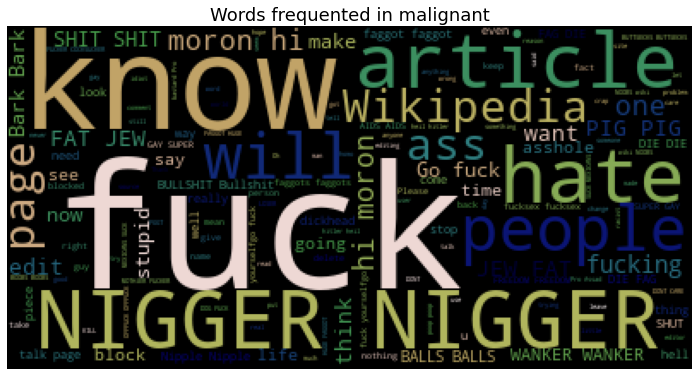

In [28]:
df_m=train.loc[:,['comment_text','malignant']]
wcloud(df_m,'malignant')

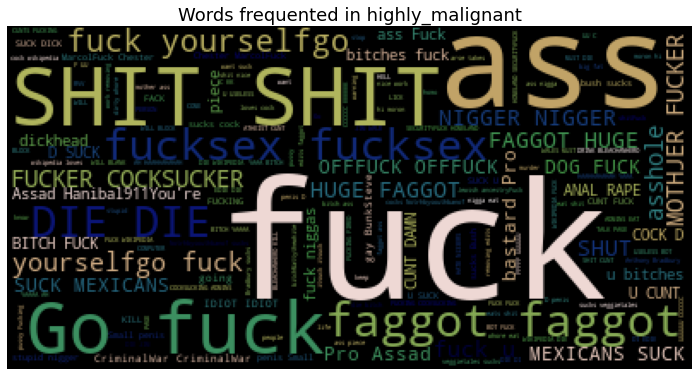

In [29]:
df_hm=train.loc[:,['comment_text','highly_malignant']]
wcloud(df_hm,'highly_malignant')

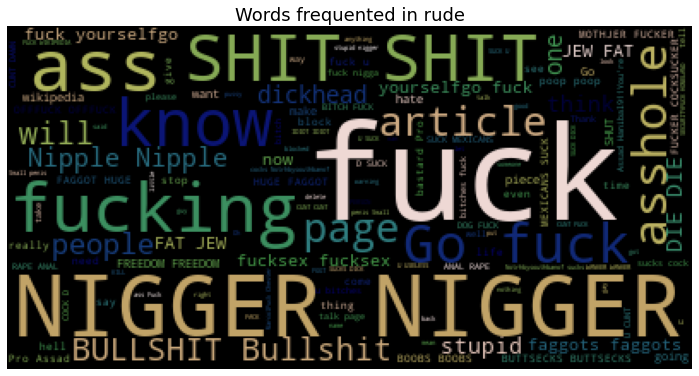

In [30]:
df_r=train.loc[:,['comment_text','rude']]
wcloud(df_r,'rude')

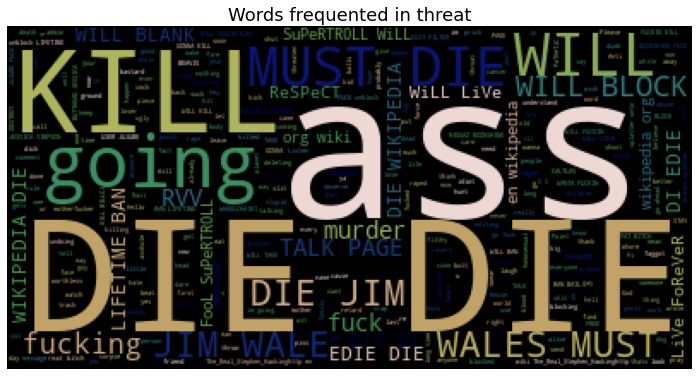

In [31]:
df_t=train.loc[:,['comment_text','threat']]
wcloud(df_t,'threat')

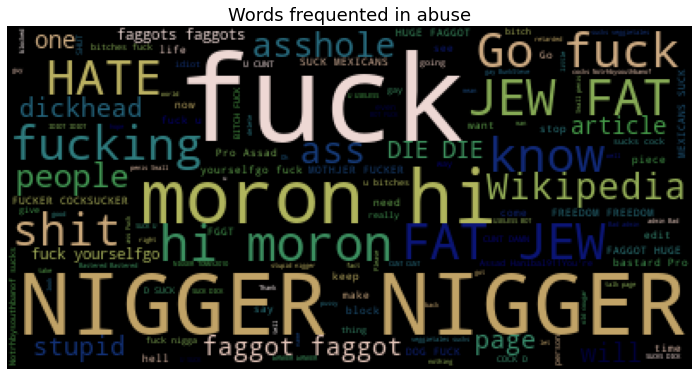

In [32]:
df_a=train.loc[:,['comment_text','abuse']]
wcloud(df_a,'abuse')

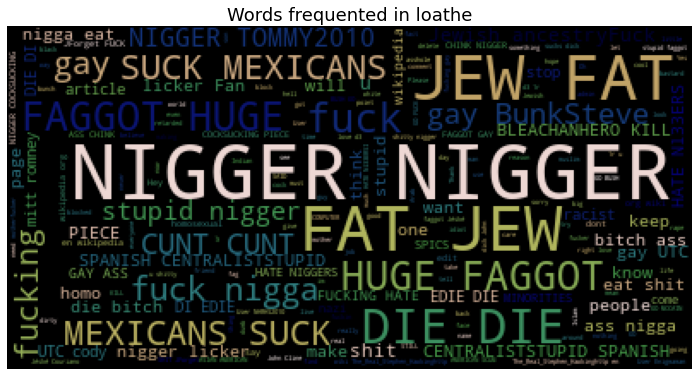

In [33]:
df_l=train.loc[:,['comment_text','loathe']]
wcloud(df_l,'loathe')

### Lets convert object and numerical datatypes

In [34]:
object_cols=[]

for i in train.dtypes.index:
    if train.dtypes[i] == 'object':
        object_cols.append(i)
object_cols

['comment_text']

In [35]:
numerical_cols=[]

for i in train.dtypes.index:
    if train.dtypes[i] != 'object':
        numerical_cols.append(i)
numerical_cols

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

# Statistical Data:

In [36]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualization of Data:

### Countplot

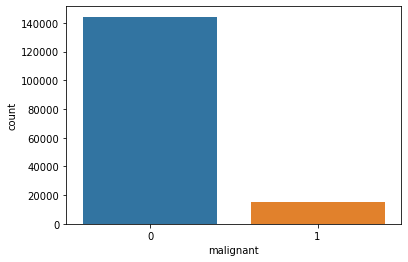

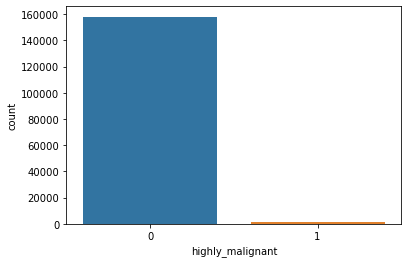

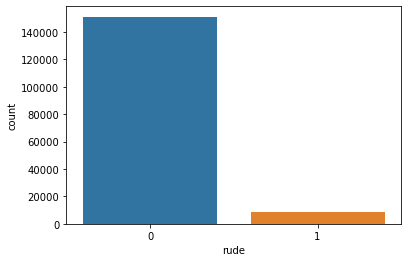

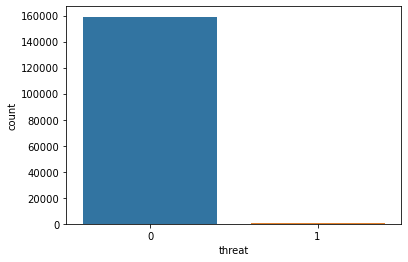

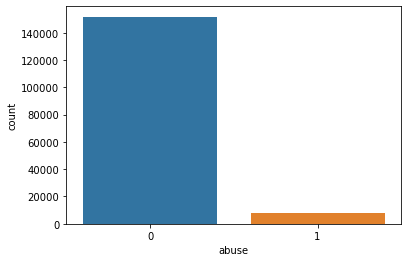

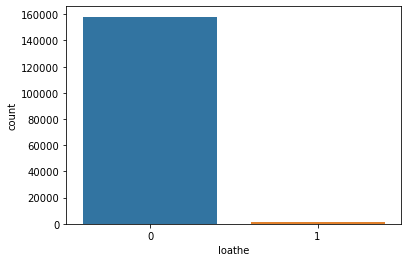

In [37]:
# lets plot all features using countplot
feature=train.columns[1:]
for col in feature:
    sns.countplot(train[col])
    plt.show()

- In the first graph of malignant we can clearly observe that most of the messages are not malignant.
- In the second image we can clearly observe that there are very less highly malignant messages.
- Same in third picture there are few rude comments in the dataset.
- In 4th we can observe that there are very few cases/almost negligible of threat comments
- In 5th image we can see that there are some messages with abusive language.
- While in the sixth image we can clearly see that there are very few cases of loathe messages.

In [38]:
# lets create a list of feature columns
featu=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [39]:
# lets store the no. of counts for every target
counts=train[featu].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

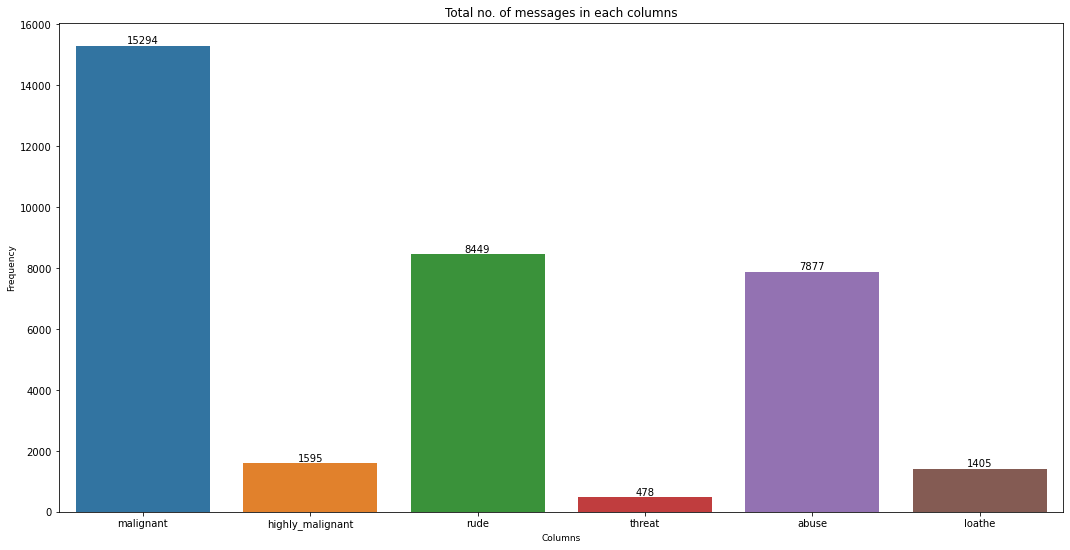

In [40]:
# lets plot and visualize count of each columns
plt.figure(figsize=(18,9))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Frequency', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

- Here we can clearly see that maximum no. of messages were sent in malignant messages category, followed by rude and abuse.

### Distribution plot

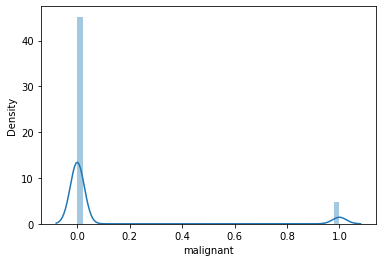

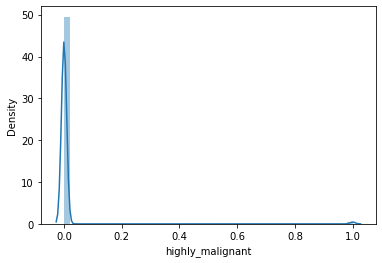

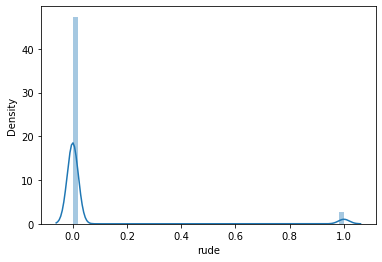

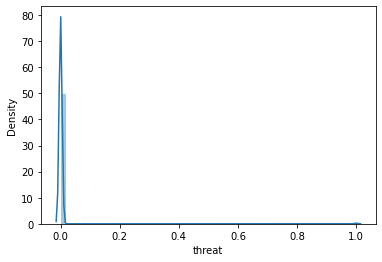

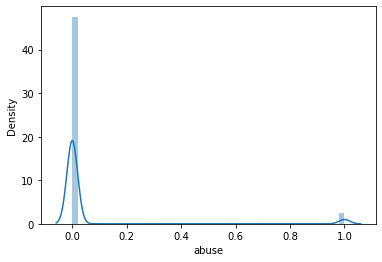

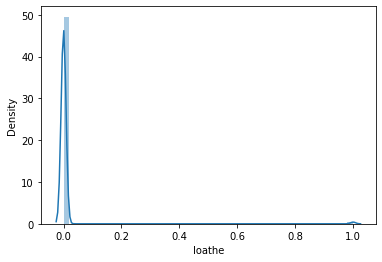

In [41]:
#lets check the distribution of data using distplot
for col in train[featu].describe().columns:
    sns.distplot(train[featu][col])
    plt.show()

### Histogram plot

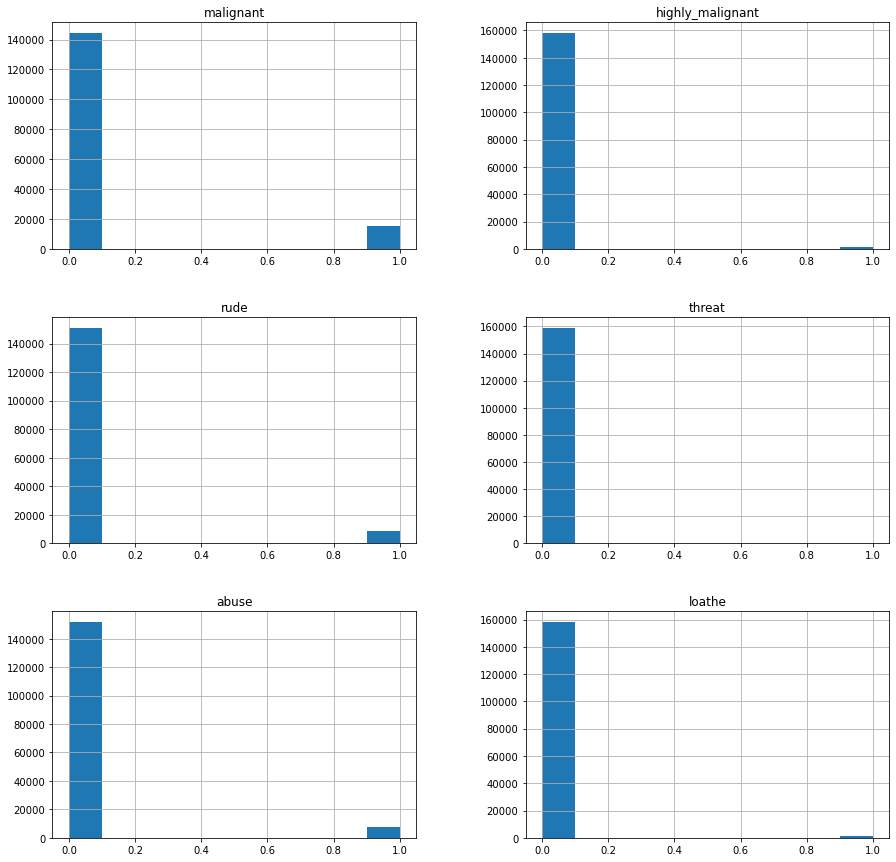

In [42]:
train.hist(figsize=(15,15))
plt.show()

### Barplot

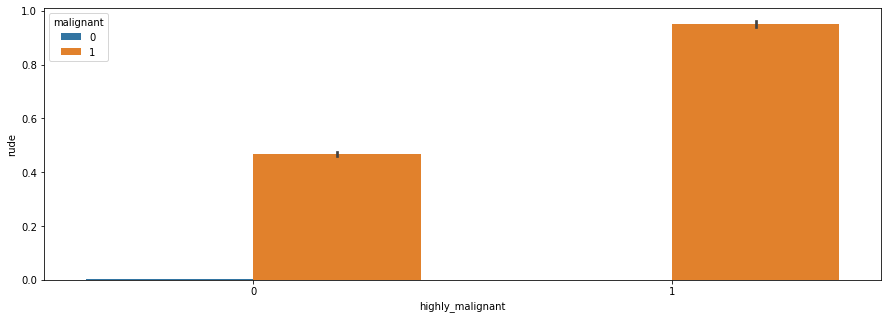

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = "highly_malignant", y = "rude", data = train ,hue='malignant')
plt.show()

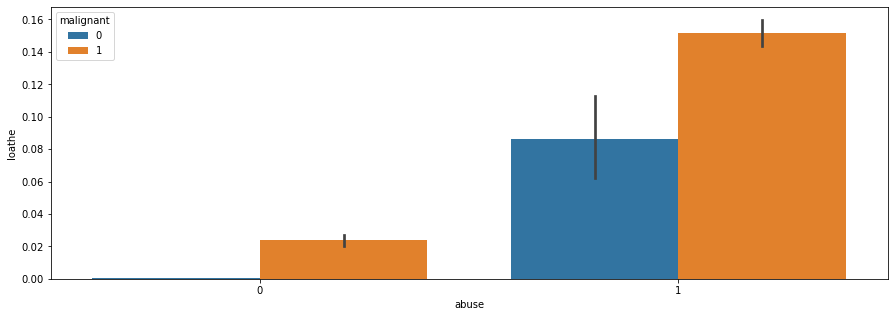

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(x = "abuse", y = "loathe", data = train ,hue='malignant')
plt.show()

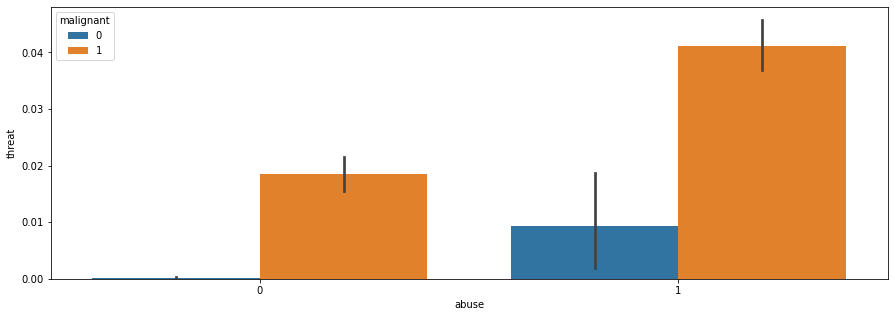

In [45]:
plt.figure(figsize = (15,5))
sns.barplot(x = "abuse", y = "threat", data = train ,hue='malignant')
plt.show()

### Scatterplot

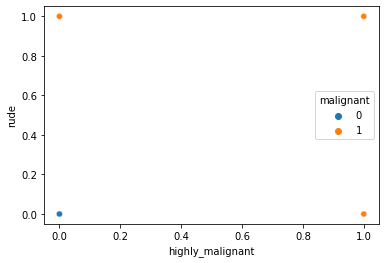

In [46]:
sns.scatterplot(x = "highly_malignant", y = "rude" ,hue='malignant', data = train)
plt.show()

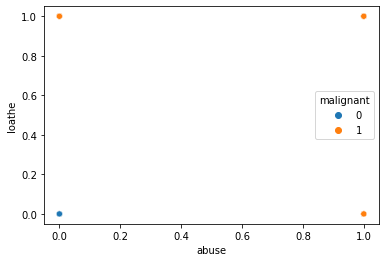

In [47]:
sns.scatterplot(x = "abuse", y = "loathe" ,hue='malignant', data = train)
plt.show()

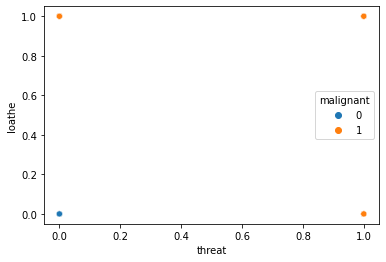

In [48]:
sns.scatterplot(x = "threat", y = "loathe" ,hue='malignant', data = train)
plt.show()

# Checking Correlation

In [49]:
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


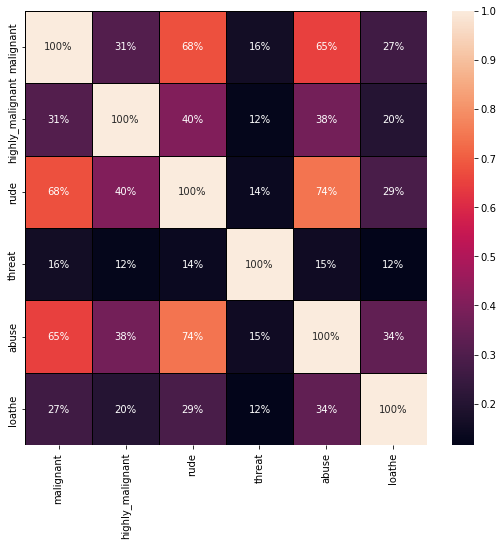

In [50]:
# lets visualize correlation using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(train.corr(),linewidth=0.5, linecolor='black',fmt='.0%',annot=True)
plt.show()

# Data Pre-Processing

In [51]:
# lets create label column in train dataset
c_label= ['malignant','highly_malignant','rude','threat','abuse','loathe']
train[c_label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [52]:
train['label']=train[c_label].sum(axis=1)
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


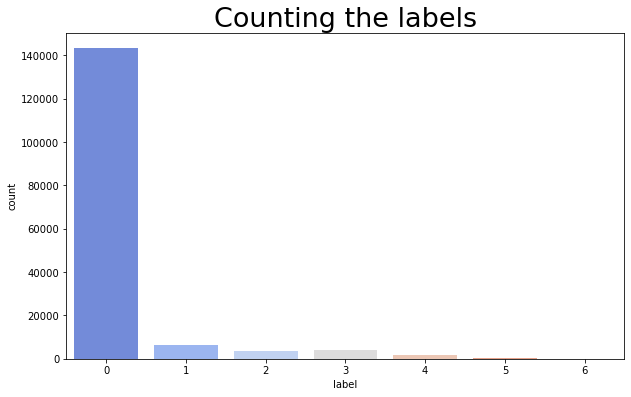

In [53]:
#lets Check the count of labels
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting the labels',fontsize=27)
plt.show()

# Model building

### Vectorizer

In [54]:
# lets convert text data using TfidfVectorizer
# lets import library for vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [55]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tfidf.fit_transform(train['comment_text'])

In [56]:
# lets first convert features into number vectors
y=train['label']

In [57]:
# lets check the shape of the dataset
print(X.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [58]:
#Doing the above process for test data 
test_vec = tfidf.fit_transform(df['comment_text'])
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [59]:
test_vec.shape

(153164, 14000)

# Building the model:

In [60]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [61]:
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 14000) 		 (47872, 14000)


In [62]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


# Model Selection:

In [63]:
#Importing required libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [64]:
#Initializing the instance of the model
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
rf = RandomForestClassifier()

In [65]:
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n') 

In [66]:
#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb,rf]:
   clf = OneVsRestClassifier(classifier)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   print_score(y_pred, classifier)

classifier: LinearSVC
Jaccard score: 0.8484111355650797
Accuracy score: 0.9179896390374331
f1_score: 0.9179896390374331
Precision :  0.9179896390374331
Recall: 0.9179896390374331
Hamming loss:  0.08201036096256685
Confusion matrix:
  [[[ 2857  2011]
  [  259 42745]]

 [[45360   604]
  [ 1574   334]]

 [[46492   336]
  [  897   147]]

 [[45870   739]
  [  641   622]]

 [[47132   212]
  [  436    92]]

 [[47735    21]
  [  110     6]]

 [[47860     3]
  [    9     0]]]

classifier: LogisticRegression
Jaccard score: 0.8435351882160392
Accuracy score: 0.9151278409090909
f1_score: 0.9151278409090909
Precision :  0.9151278409090909
Recall: 0.9151278409090909
Hamming loss:  0.08487215909090909
Confusion matrix:
  [[[ 2063  2805]
  [   85 42919]]

 [[45541   423]
  [ 1715   193]]

 [[46665   163]
  [  980    64]]

 [[46002   607]
  [  672   591]]

 [[47283    61]
  [  487    41]]

 [[47752     4]
  [  115     1]]

 [[47863     0]
  [    9     0]]]

classifier: MultinomialNB
Jaccard score: 0.83

### We will select LinearSVC as our best model, so we will perform hyper parameter tuning on LinearSVC and try to increase its accuracy score.

# Hyper parameter tuning:

In [67]:
#Creating parameter list to pass in GridSearchCV
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
svc = OneVsRestClassifier(LinearSVC())

In [70]:
GCV =  GridSearchCV(svc, param, cv = 3, verbose = 0, n_jobs=1)

In [71]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [77]:
# Now lets get the results

print(GCV.best_params_)

{'estimator__C': 2, 'estimator__dual': False, 'estimator__intercept_scaling': 2, 'estimator__loss': 'hinge', 'estimator__multi_class': 'crammer_singer', 'estimator__penalty': 'l1'}


# Final Model:

In [78]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=2))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.8486609642601997
Accuracy score: 0.9181358622994652
f1_score: 0.9181358622994652
Precision :  0.9181358622994652
Recall: 0.9181358622994652
Hamming loss:  0.08186413770053476

Confusion matrix: 
 [[[ 2896  1972]
  [  289 42715]]

 [[45491   473]
  [ 1641   267]]

 [[46532   296]
  [  897   147]]

 [[45780   829]
  [  570   693]]

 [[47070   274]
  [  409   119]]

 [[47691    65]
  [  104    12]]

 [[47853    10]
  [    9     0]]]


- Here we have successfully improved slightly prediction score from 91.79 to 91.81%.

In [80]:
lsvc_prediction=model.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':lsvc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


# Saving Our Best Model:

In [81]:
import pickle
filename='MalignantCommentsClassifier.pkl'
pickle.dump(model,open(filename,'wb'))

In [82]:
#Checking our vectorized test data
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [83]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier.pkl','rb'))
fitted_model

OneVsRestClassifier(estimator=LinearSVC(C=2, dual=False, intercept_scaling=2,
                                        loss='hinge',
                                        multi_class='crammer_singer',
                                        penalty='l1'))

# Prediction using test dataset:

In [85]:
#Test predictions
test_results=pd.DataFrame(df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [86]:
#Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

In [87]:
#Lets load the test data set
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [88]:
#Lets load the test data set
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [89]:
#Predictions
test_prediction=model.predict(test_vec)
df=pd.DataFrame({'Predictions':test_prediction})
df

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [90]:
# lets save the predictions
test_results=pd.DataFrame(df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

# Saving the predictions

In [91]:
malignant_prediction.to_csv('Malignant_DataPredictions.csv')